

```
# This is formatted as code
```

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Yesa Devina Reza
- **Email:** yesadevina@gmail.com
- **ID Dicoding:** yesadevina

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Bagaimana pengaruh cuaca terhadap rata-rata pengguna sepeda?
- Pada jam berapa pengguna sepeda paling banyak dalam sehari?
- Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?
- Bagaimana hubungan antara suhu dan jumlah penggunaan sepeda?
- Apakah ada perbedaan penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
bike_per_day_df = pd.read_csv('day.csv')
bike_per_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_per_hour_df = pd.read_csv('hour.csv')
bike_per_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Berdasarkan data diatas, library pandas digunakan untuk membaca data serta ditampilkan pula 5 data teratas dari setiap data yaitu bike day & bike hour.

### Assessing Data

In [4]:
bike_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
bike_per_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Dapat dilihat di atas bahwa dilakukan pengecekan data bike per day dan bike per hour untuk melihat jumlah serta tipe-tipe data tersebut. Namun, ternyata ditemukan variabel yang memiliki tipe data yang tidak sesuai (invalid) yaitu 'dteday' maka akan dilakukan perubahan tipe data untuk variabel tersebut pada proses cleaning data.

In [6]:
bike_per_day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
bike_per_hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**

Berdasarkan pengecekan missing value pada setiap data (bike per day dan bike per hour) ternyata tidak didapatkan adanya missing value pada setiap data.

In [8]:
print("Jumlah duplikasi bike day: ", bike_per_day_df.duplicated().sum())
print("Jumlah duplikasi bike hour: ", bike_per_hour_df.duplicated().sum())

Jumlah duplikasi bike day:  0
Jumlah duplikasi bike hour:  0


**Insight:**

Berdasarkan pengecekan apakah terdapat data duplikat atau tidak, hasilnya tidak terdapat duplikat pada setiap data.


In [9]:
bike_per_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
bike_per_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**


Berdasarkan pengecekan rangkuman statistik setiap data, dapat dilihat bahwa tidak terdapat invalid value pada setiap statistik data tersebut.

### Cleaning Data

In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_per_day_df[column] = pd.to_datetime(bike_per_day_df[column])

datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_per_hour_df[column] = pd.to_datetime(bike_per_hour_df[column])

In [12]:
bike_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
bike_per_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

Pada tahap cleaning data ini, dilakukan perubahan tipe data pada variabel 'dteday' yang awalnya bertipe data objek kemudian diubah menjadi datetime.

## Exploratory Data Analysis (EDA)



```
# This is formatted as code
```

### Explore all data

--- Univariate Analysis ---



Distribusi untuk Variabel Numerik




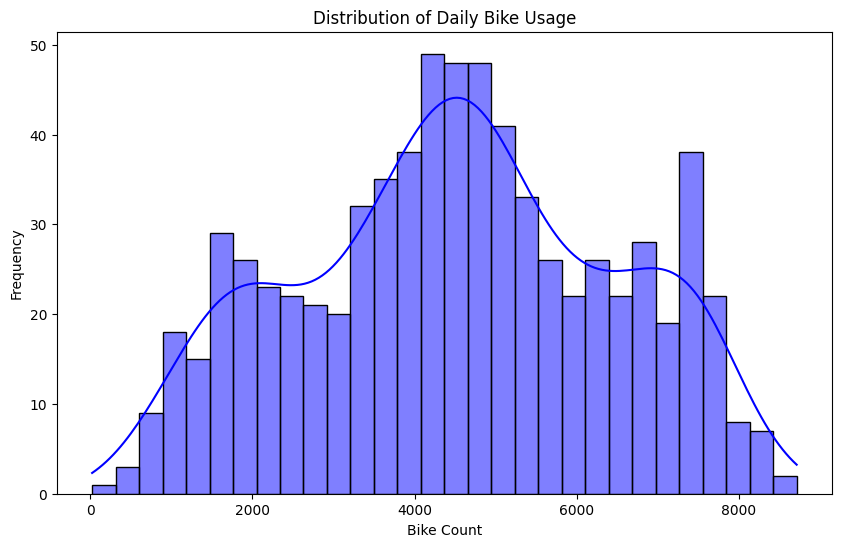

In [14]:
# Distribution of bike usage (daily)
plt.figure(figsize=(10, 6))
sns.histplot(bike_per_day_df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Daily Bike Usage')
plt.xlabel('Bike Count')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Dapat dilihat visualisasi di atas bahwa 'daily bike usage' cenderung memiliki distribusi yang tidak simetris.
- Sementara itu, setiap hari penggunaan sepeda berada dalam kisaran tertentu (misalnya, antara 2000 hingga 4000), dengan beberapa hari menunjukkan penggunaan yang sangat tinggi. Hal ini menunjukkan bahwa mungkin adanya event khusus atau kondisi yang memengaruhi penggunaan sehingga pola penggunaan rutin terdapat sedikit anomali.



Distribusi untuk Variabel Kategorik






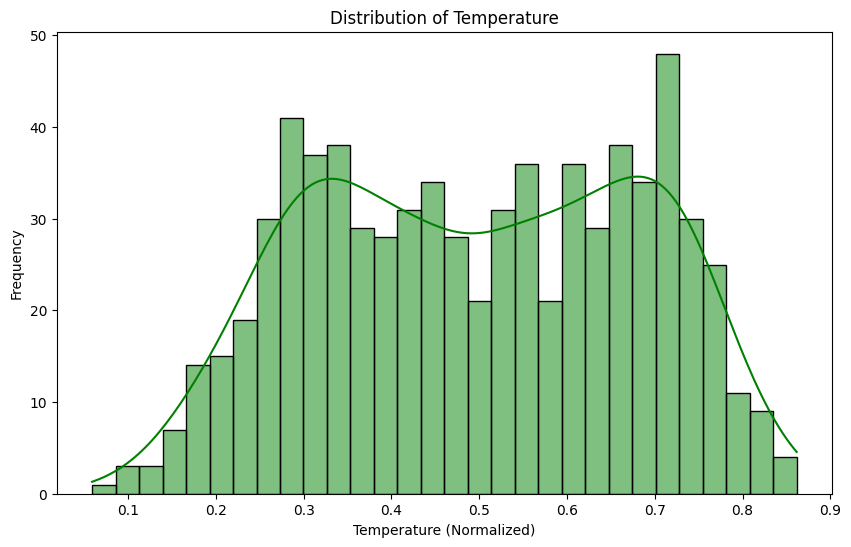

In [15]:
# Distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(bike_per_day_df['temp'], bins=30, kde=True, color='green')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Frequency')
plt.show()

**Insight:**
Dapat dilihat distribusi suhu di atas, suhu yang dominan berada pada kisaran nilai menengah (sekitar 0.4–0.7). Ini menunjukkan bahwa kondisi suhu yang moderat lebih umum terjadi dibanding suhu yang sangat rendah atau sangat tinggi.


--- Bivariate Analysis ---

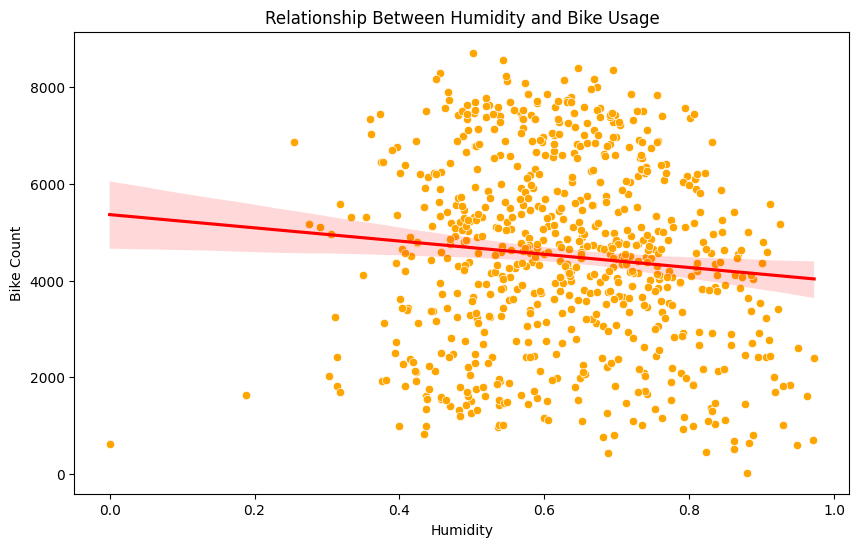

In [16]:
# Relationship between humidity and bike usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bike_per_day_df['hum'], y=bike_per_day_df['cnt'], color='orange')
sns.regplot(x=bike_per_day_df['hum'], y=bike_per_day_df['cnt'], scatter=False, color='red')
plt.title('Relationship Between Humidity and Bike Usage')
plt.xlabel('Humidity')
plt.ylabel('Bike Count')
plt.show()


**Insight:**
- Terdapat hubungan negatif antara kelembapan dan penggunaan sepeda, di mana penggunaan cenderung menurun saat kelembapan meningkat.

- Meskipun demikian, ada variasi yang signifikan, terutama pada tingkat kelembapan menengah (0.4 - 0.7), yang menunjukkan bahwa faktor lain mungkin memengaruhi.

<ipython-input-17-17769de7a9ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=bike_per_day_df, palette='Set3')


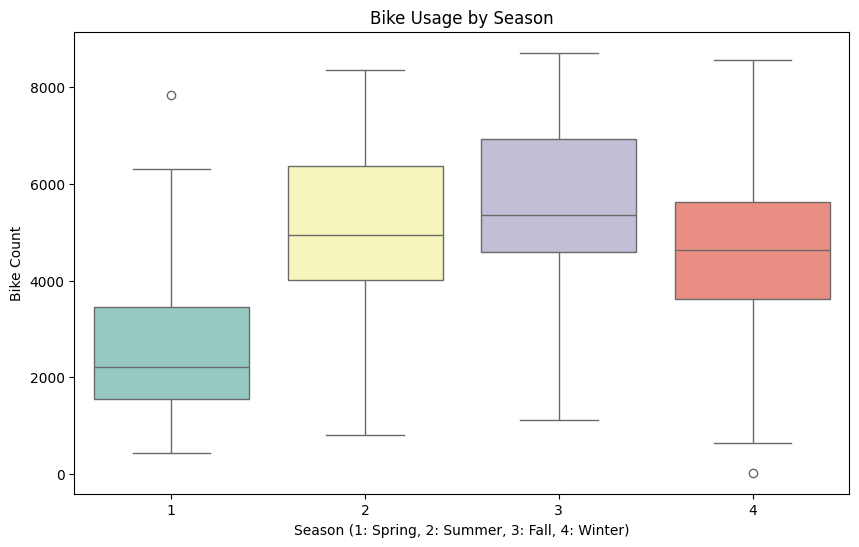

In [17]:
# Boxplot for bike usage by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=bike_per_day_df, palette='Set3')
plt.title('Bike Usage by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Bike Count')
plt.show()

**Insight:**
- Fall season (3) memiliki penggunaan sepeda tertinggi dibandingkan musim lainnya.
- Spring season (1) cenderung memiliki penggunaan terendah.
- Variasi penggunaan juga lebih besar di Summer dan Fall Season. Hal ini menunjukkan faktor musiman (season) signifikan memengaruhi jumlah pengguna sepeda.

--- Multivariate Analysis ---

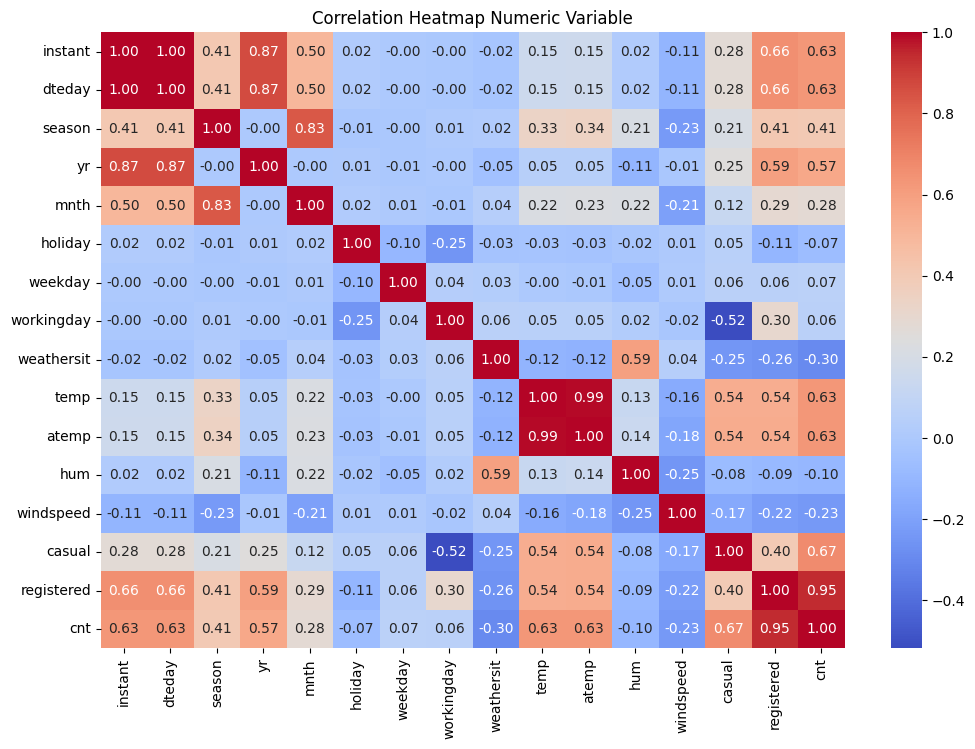

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
day_correlation = bike_per_day_df.corr()
sns.heatmap(day_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Numeric Variable')
plt.show()

**Insight:**

- Variabel seperti *temp* (temperatur) memiliki korelasi positif dengan penggunaan sepeda (cnt), sedangkan *hum* (kelembapan) memiliki korelasi negatif.
- Sementara itu, korelasi antara *windspeed* (kecepatan angin) dan penggunaan sepeda sangat lemah atau tidak signifikan.

 --- Resampling for Time Trends ---



<ipython-input-19-103b9eff279d>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = bike_per_day_df.resample('M', on='dteday')['cnt'].mean().reset_index()


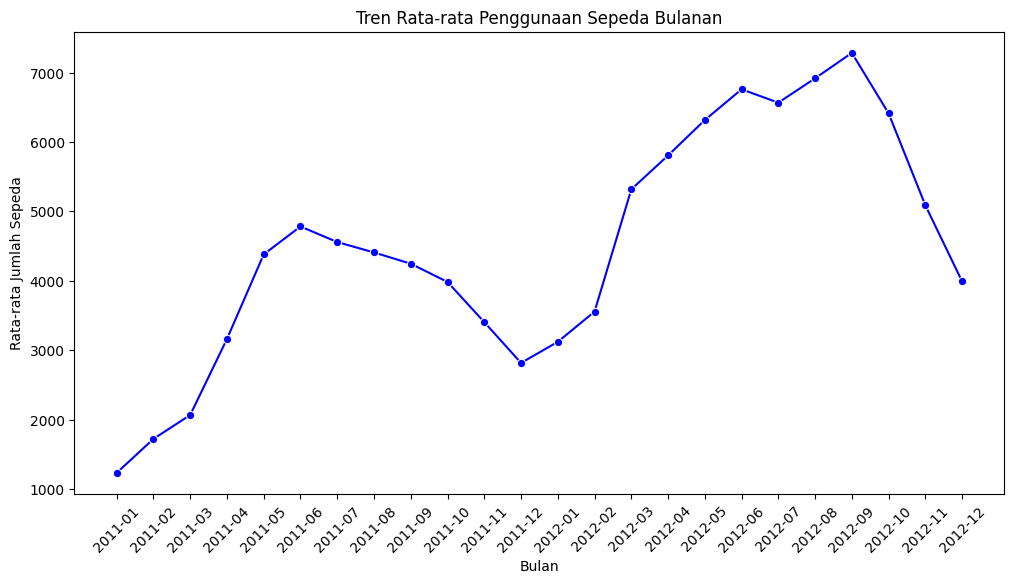

In [19]:
# Rata-rata penggunaan sepeda bulanan
bike_per_day_df['dteday'] = pd.to_datetime(bike_per_day_df['dteday'])
monthly_trend = bike_per_day_df.resample('M', on='dteday')['cnt'].mean().reset_index()
monthly_trend['month'] = monthly_trend['dteday'].dt.strftime('%Y-%m')

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', data=monthly_trend, marker='o', color='blue')
plt.title('Tren Rata-rata Penggunaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Grouping the hourly data, including 'hr' and 'cnt'
hourly_aggregated = bike_per_hour_df.groupby(['dteday', 'season', 'weathersit', 'holiday', 'workingday', 'hr'])[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].mean().reset_index()

# Merging the aggregated hourly data with the daily data
combined_df = pd.merge(bike_per_day_df, hourly_aggregated, on=['dteday', 'season', 'weathersit', 'holiday', 'workingday'], suffixes=('_day', '_hour'))

## Visualization & Explanatory Analysis

In [21]:
# Menampilkan data dalam dataframe sebelum visualisasi
bike_per_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
bike_per_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
combined_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp_day,...,windspeed_day,casual,registered,cnt_day,hr,temp_hour,atemp_hour,hum_hour,windspeed_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.160446,331,654,985,5,0.24,0.2576,0.75,0.0896,1.0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.160446,331,654,985,13,0.46,0.4545,0.72,0.2985,94.0
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.160446,331,654,985,14,0.46,0.4545,0.72,0.2836,106.0
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.160446,331,654,985,15,0.44,0.4394,0.77,0.2985,110.0
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.160446,331,654,985,16,0.42,0.4242,0.82,0.2985,93.0


### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap rata-rata pengguna sepeda?

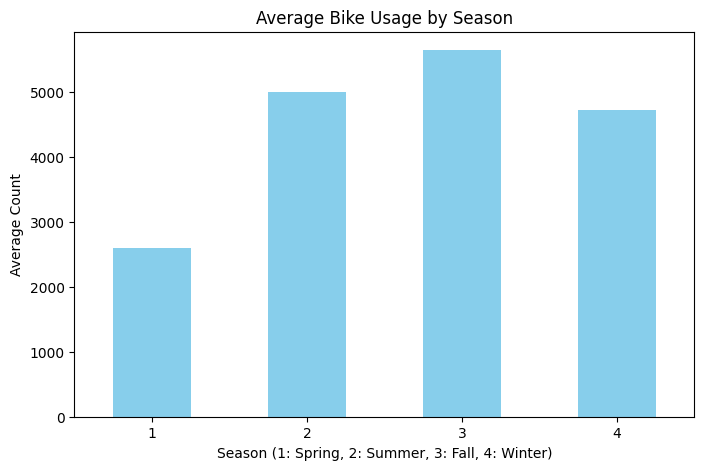

In [24]:
# Question 1: Impact of season on bike usage
season_counts = bike_per_day_df.groupby('season')['cnt'].mean()
plt.figure(figsize=(8, 5))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Average Bike Usage by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Visualisasi bar chart di atas menunjukkan rata-rata penggunaan sepeda di setiap season.
- Penggunaan sepeda tertinggi terjadi di fall season (3) dan penggunaan sepeda terendah terjadi di spring season (1).
- Cuaca yang lebih hangat di summer and fall season dapat mendorong penggunaan sepeda yang lebih tinggi.

### Pertanyaan 2: Pada jam berapa pengguna sepeda paling banyak dalam sehari?

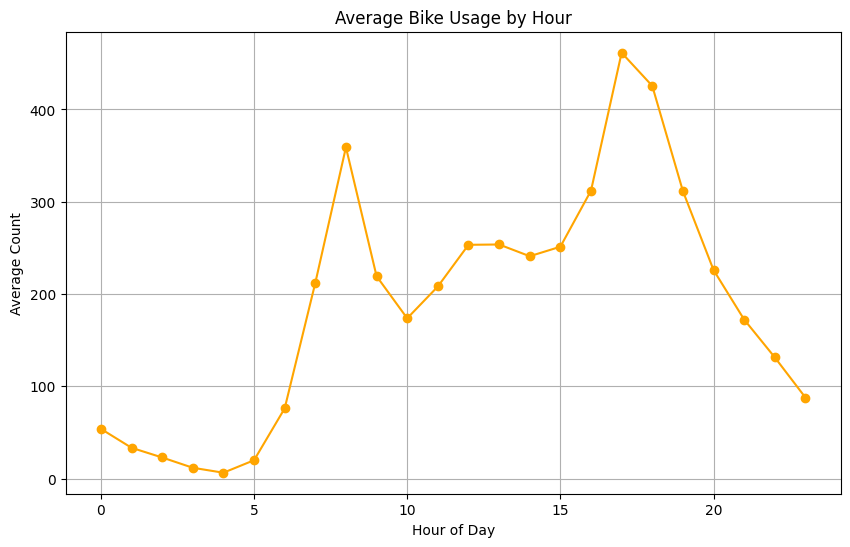

In [25]:
# Question 2: Busiest hours in a day
hourly_counts = bike_per_hour_df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='line', marker='o', color='orange')
plt.title('Average Bike Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.grid()
plt.show()

**Insight:**
- Penggunaan sepeda memuncak dua kali dalam sehari, yaitu pada pukul 8 pagi dan 5 sore.
- Pola tersebut konsisten dengan jam sibuk, di mana orang menggunakan sepeda untuk perjalanan ke dan dari tempat kerja atau sekolah.

### Pertanyaan 3: Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?

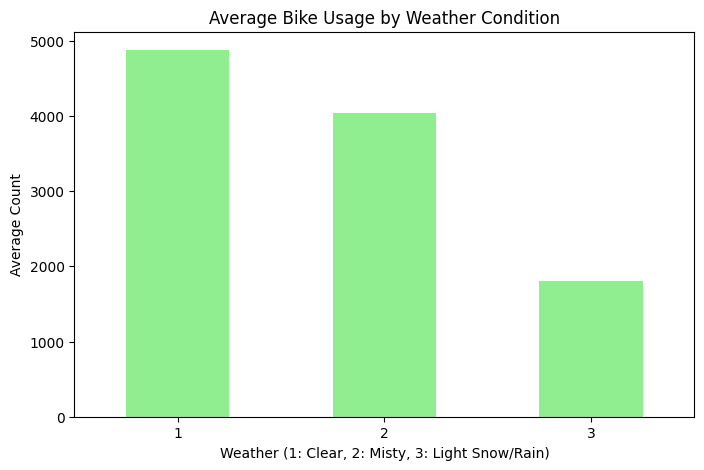

In [26]:
# Question 3: Effect of weather conditions on bike usage
weather_counts = bike_per_day_df.groupby('weathersit')['cnt'].mean()
plt.figure(figsize=(8, 5))
weather_counts.plot(kind='bar', color='lightgreen')
plt.title('Average Bike Usage by Weather Condition')
plt.xlabel('Weather (1: Clear, 2: Misty, 3: Light Snow/Rain)')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Penggunaan sepeda tertinggi terjadi pada kondisi clear weather (1).
- Penggunaan menurun secara signifikan pada kondisi misty (2) and light snow/rain weather (3).
- Cuaca yang buruk memengaruhi keinginan pengguna untuk bersepeda.

### Pertanyaan 4: Bagaimana hubungan antara suhu dan jumlah penggunaan sepeda?

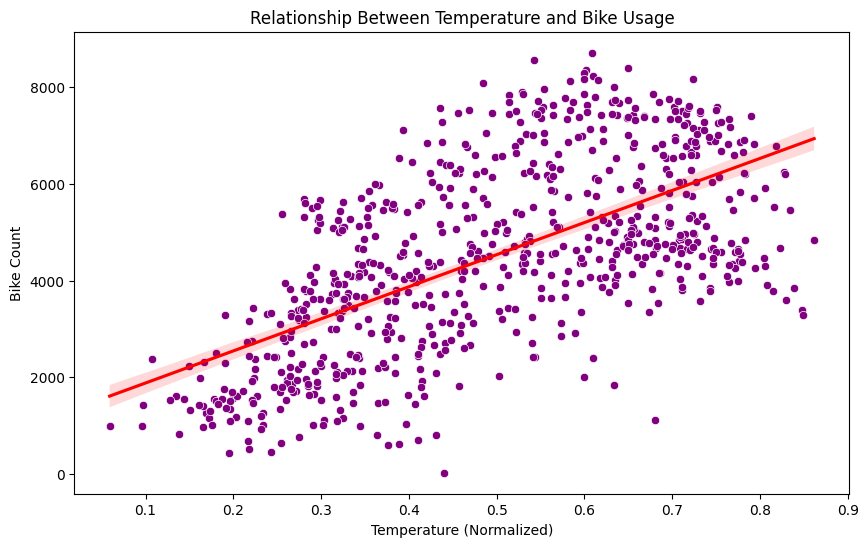

In [27]:
# Question 4: Relationship between temperature and bike usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bike_per_day_df['temp'], y=bike_per_day_df['cnt'], color='purple')
sns.regplot(x=bike_per_day_df['temp'], y=bike_per_day_df['cnt'], scatter=False, color='red')
plt.title('Relationship Between Temperature and Bike Usage')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Bike Count')
plt.show()

**Insight:**
- Berdasarkan visualisasi scatter plot di atas terdapat hubungan positif antara suhu dan penggunaan sepeda.
- Penggunaan sepeda cenderung meningkat saat suhu lebih hangat, tetapi dapat menurun apabila suhu ekstrem.

### Pertanyaan 5: Apakah ada perbedaan penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

<ipython-input-28-58c65917b89c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=bike_per_day_df, palette='Set2')


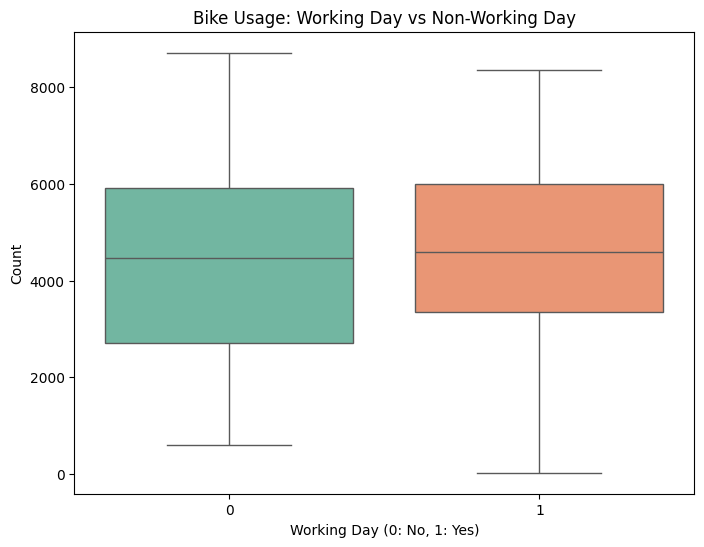

In [28]:
# Question 5: Difference in bike usage on weekdays vs weekends
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='cnt', data=bike_per_day_df, palette='Set2')
plt.title('Bike Usage: Working Day vs Non-Working Day')
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

**Insight:**

- Visualisasi Box plot di atas menunjukkan distribusi penggunaan sepeda pada hari kerja (working day) dan akhir pekan (weekends).
- Penggunaan sepeda cenderung lebih tinggi pada akhir pekan dibandingkan hari kerja. Hal ini karena pola rekreasi atau aktivitas santai pada akhir pekan.

## Analisis Lanjutan (Opsional)

**Menerapkan analisis lanjutan yaitu Clustering Analysis dengan teknik grouping dan binning**

*Manual Grouping* bertujuan untuk mengelompokkan data berdasarkan aturan atau statistik yang sudah ada untuk mengidentifikasi pola berdasarkan tingkat penggunaan sepeda. Sedangkan, *Binning* bertujuan untuk mengelompokkan data berdasarkan rentang nilai atau kategori (misalnya berdasarkan waktu atau cuaca) untuk mengidentifikasi pola atau tren yang mungkin tersembunyi dalam data kontinu.

<ipython-input-29-54cd5f22fb30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Usage_Level', y='cnt', data=bike_per_day_df, palette='Pastel1')


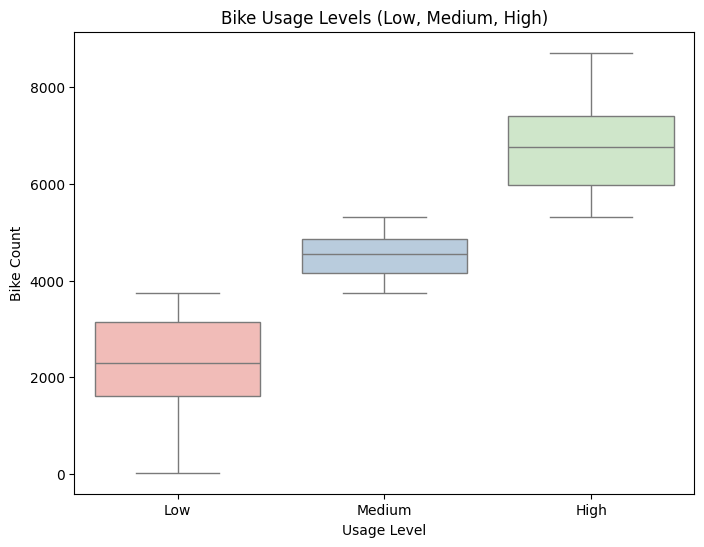

In [29]:
# Group by bike usage levels based on quantiles
bike_per_day_df['Usage_Level'] = pd.qcut(bike_per_day_df['cnt'], q=3, labels=['Low', 'Medium', 'High'])

# Visualize bike usage levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='Usage_Level', y='cnt', data=bike_per_day_df, palette='Pastel1')
plt.title('Bike Usage Levels (Low, Medium, High)')
plt.xlabel('Usage Level')
plt.ylabel('Bike Count')
plt.show()


**Insight:**
- Visualisasi boxplot di atas menunjukkan data dipecah menjadi tiga kelompok tingkat penggunaan sepeda berdasarkan kuartil yaitu:

1.   Low (Rendah): Penggunaan sepeda paling sedikit.
2.   Medium (Sedang): Penggunaan sepeda rata-rata.
3.   High (Tinggi): Penggunaan sepeda paling banyak.
- Boxplot juga menunjukkan distribusi jumlah sepeda untuk setiap tingkat penggunaan, mencakup median, kuartil, dan outlier.
- Hari dengan tingkat penggunaan rendah berarti memiliki faktor eksternal yang membatasi aktivitas, seperti cuaca buruk atau hari kerja tertentu. Sedangkan, hari dengan penggunaan tinggi menunjukkan adanya pola musiman (seperti musim gugur) dan cenderung terjadi pada akhir pekan.


<ipython-input-30-1856e3926af7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather_Bin', y='cnt', data=bike_per_day_df, palette='Set2')


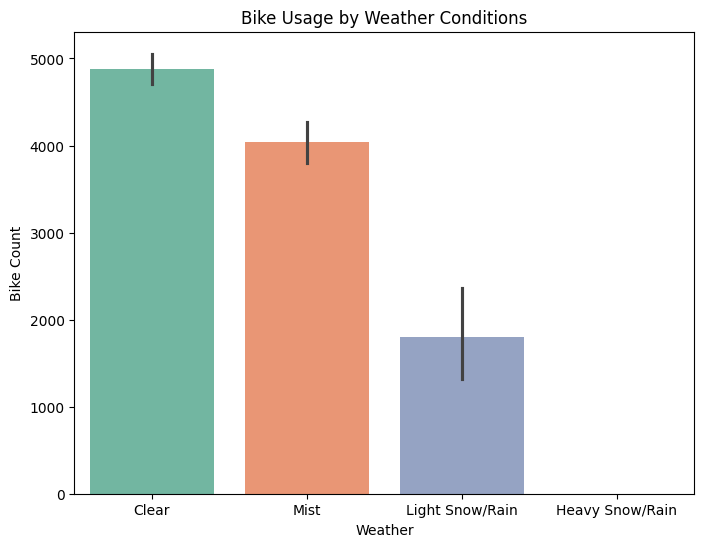

In [30]:
# Binning based on weather condition
bike_per_day_df['Weather_Bin'] = pd.cut(bike_per_day_df['weathersit'], bins=[0, 1, 2, 3, 4], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Snow/Rain'])

# Visualize weather-based bike usage
plt.figure(figsize=(8, 6))
sns.barplot(x='Weather_Bin', y='cnt', data=bike_per_day_df, palette='Set2')
plt.title('Bike Usage by Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Bike Count')
plt.show()

**Insight:**
- Visualisasi bar chart di atas dikelompokkan berdasarkan kondisi cuaca:
1.   Clear (Cerah): Cuaca cerah.
2.   Mist (Berkabut): Cuaca berkabut ringan
3.   Light Snow/Rain (Salju/Hujan Ringan): Cuaca dengan hujan atau salju ringan.
4.   Heavy Snow/Rain (Salju/Hujan Lebat): Cuaca dengan curah salju atau hujan yang tinggi.
- Barplot menunjukkan rata-rata jumlah pengguna sepeda untuk setiap kategori cuaca.
- Penggunaan sepeda paling tinggi terjadi saat cuaca cerah, karena mendukung aktivitas luar ruangan.
- Sementara itu, ada tingkat penggunaan yang cukup baik meskipun lebih rendah dari cuaca cerah yaitu cuaca berkabut. Kemudian, penggunaan sepeda menurun drastis dalam kondisi hujan atau salju. Hal ini menunjukkan bahwa cuaca buruk sebagai penghambat utama menurunnya penggunaan sepeda.


## Conclusion

Berdasarkan eksplorasi dan visualisasi data pada dataset penggunaan sepeda harian (day) dan per jam (hour), kesimpulan yang dapat diambil dari semua hasil analisis yaitu:

**1. Bagaimana pengaruh cuaca terhadap rata-rata pengguna sepeda?**

- Rata-rata penggunaan sepeda tertinggi terjadi pada musim gugur (fall season - kode 3) dengan jumlah rata-rata pengguna mencapai nilai maksimum dibanding musim lainnya.
- Penggunaan sepeda terendah terjadi pada musim semi (spring season - kode 1), yang cenderung memiliki cuaca kurang mendukung aktivitas luar ruangan.

Kesimpulan:

Cuaca yang lebih hangat di musim panas (*summer season*) dan musim gugur (*fall season*) mendorong peningkatan penggunaan sepeda, sedangkan cuaca dingin atau basah di musim semi mengurangi jumlah pengguna.

**2. Pada jam berapa pengguna sepeda paling banyak dalam sehari?**

- Penggunaan sepeda memuncak dua kali dalam sehari, yaitu pada pukul 08:00 pagi dan 17:00 sore.
- Jam sibuk ini konsisten dengan waktu perjalanan ke tempat kerja atau sekolah di pagi hari, dan perjalanan pulang di sore hari.

Kesimpulan:

Aktivitas pengguna sepeda sebagian besar dipengaruhi oleh jam sibuk masyarakat, yang menunjukkan penggunaan sepeda sebagai moda transportasi utama.

**3. Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?**

- Kondisi cuaca yang cerah (clear weather - kode 1) memiliki rata-rata pengguna sepeda tertinggi.
- Penggunaan sepeda menurun secara signifikan pada kondisi berkabut (misty weather - kode 2) dan kondisi hujan ringan atau salju (light snow/rain weather - kode 3).

Kesimpulan:

Cuaca cerah mendorong lebih banyak orang untuk menggunakan sepeda, sedangkan cuaca buruk seperti kabut dan hujan mengurangi keinginan pengguna untuk bersepeda.

**4. Bagaimana hubungan antara suhu dan jumlah penggunaan sepeda?**

- Terdapat hubungan positif antara suhu dan penggunaan sepeda, di mana jumlah pengguna meningkat seiring dengan kenaikan suhu.
- Namun, penggunaan sepeda cenderung menurun ketika suhu terlalu tinggi (ekstrem), yang mengindikasikan adanya tingkat kenyamanan tertentu yang memengaruhi aktivitas bersepeda.

Kesimpulan: Suhu yang moderat hingga hangat meningkatkan penggunaan sepeda, tetapi suhu yang terlalu panas dapat mengurangi kenyamanan dan penggunaan.

**5. Apakah ada perbedaan penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?**

- Penggunaan sepeda pada akhir pekan lebih tinggi dibandingkan hari kerja, seperti yang terlihat dari distribusi pada box plot.
- Pola ini dapat dikaitkan dengan aktivitas rekreasi atau waktu luang yang lebih banyak tersedia pada akhir pekan (weekends).

Kesimpulan:

Pengguna sepeda lebih cenderung memanfaatkan akhir pekan untuk aktivitas rekreasi, sedangkan pada hari kerja, penggunaannya lebih fokus pada transportasi fungsional seperti ke tempat kerja atau sekolah.

In [31]:
combined_df.to_csv('combined_data.csv', index=False)